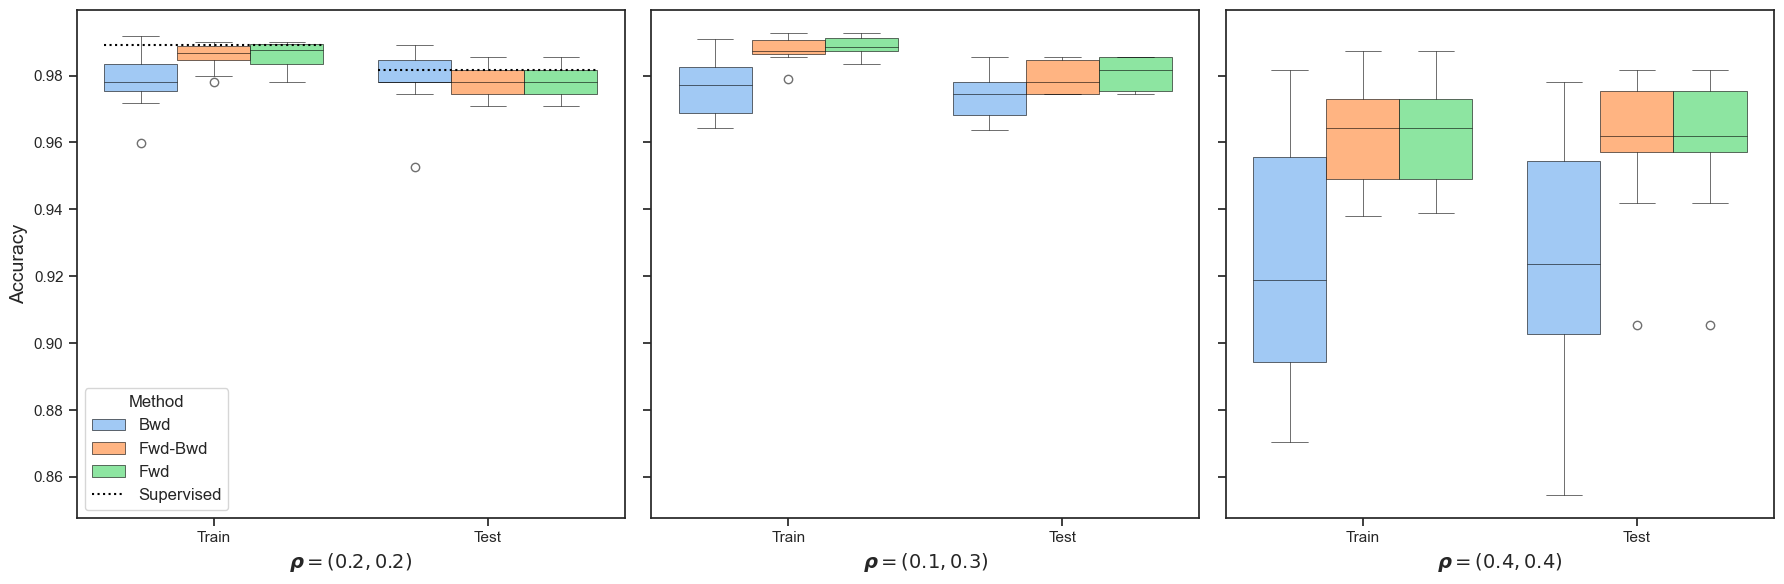

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import glob

# --- Configuration ---
folder_path = 'Results/banknote-authentication_Noisy_Natarajan'
selected_epoch = 100
selected_loss_fns = ['Backward', 'Forward', 'FB_decomposed']
corr_p_values = [0.2, 0.3, 0.4]
# Ensure these labels match your corr_p values as intended
x_labels = [r'$\boldsymbol{\rho}=(0.2,0.2)$', r'$\boldsymbol{\rho}=(0.1,0.3)$', r'$\boldsymbol{\rho}=(0.4,0.4)$']
hue_order = ['Backward', 'FB_decomposed', 'Forward']
new_labels = ['Bwd', 'Fwd-Bwd', 'Fwd']

# --- Plot Styling ---
sns.set_theme(style="ticks", palette="pastel")
line_color = 'black'
line_style = ':'
line_width = 1.5
train_xmin, train_xmax = 0.05, 0.45
test_xmin, test_xmax = 0.55, 0.95
boxplot_style = {
    "saturation": 1,
    "boxprops": dict(edgecolor='black', linewidth=0.4),
    "whiskerprops": dict(color='black', linewidth=0.4),
    "capprops": dict(color='black', linewidth=0.4),
    "medianprops": dict(color='black', linewidth=0.4)
}

# --- 1. Load Data ---
# Use glob to find all csv files in the folder
file_paths = glob.glob(os.path.join(folder_path, '*.csv'))

# Read all CSVs into a list and concatenate
# We assume all necessary columns exist in the CSVs based on your original code
try:
    df_list = [pd.read_csv(file) for file in file_paths]
    merged_df = pd.concat(df_list, ignore_index=True)
except Exception as e:
    print(f"Error loading or concatenating CSV files: {e}")
    print("Please ensure the folder path is correct and CSVs are well-formed.")
    # Exit or handle error appropriately
    exit()

# --- 2. Process Data ---
# Select and reshape data using melt for a 'long' format
try:
    df_long = pd.melt(merged_df,
                      id_vars=['epoch', 'loss_fn', 'repetition', 'corr_p'],
                      value_vars=['train_acc', 'test_acc'],
                      var_name='acc_type',
                      value_name='acc')
    # Create the 'train' column ('Train' or 'Test')
    df_long['train'] = df_long['acc_type'].str.replace('_acc', '').str.capitalize()
    df_long.drop(columns=['acc_type'], inplace=True)
except KeyError as e:
    print(f"Missing expected column in CSVs: {e}")
    print("Please ensure columns like 'epoch', 'train_acc', 'test_acc', etc., exist.")
    exit()

# --- 3. Filter Data ---
# Filter for the selected epoch and relevant loss functions
df_filtered = df_long[(df_long['epoch'] == selected_epoch) &
                      (df_long['loss_fn'].isin(selected_loss_fns + ['Supervised']))].copy()

# --- 4. Calculate Supervised Means ---
# Calculate the mean accuracy for the 'Supervised' case for each corr_p
supervised_means = df_filtered[df_filtered['loss_fn'] == 'Supervised'] \
    .groupby(['corr_p', 'train'])['acc'] \
    .mean() \
    .unstack()

# --- 5. Create Plot ---
# Create a 1x3 grid of subplots, sharing the Y-axis for easier comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Filter out 'Supervised' data, as it's plotted as a line, not a boxplot
df_boxplot = df_filtered[df_filtered['loss_fn'] != 'Supervised']

# Loop through each correlation value and its corresponding axis
for i, (corr_p, xlabel) in enumerate(zip(corr_p_values, x_labels)):
    ax = axes[i]
    # Get the data subset for the current correlation value
    data_subset = df_boxplot[df_boxplot['corr_p'] == corr_p]

    # Create the boxplot
    sns.boxplot(data=data_subset, x='train', y='acc', hue='loss_fn',
                hue_order=hue_order, ax=ax, **boxplot_style)

    # Add Supervised lines if data exists for this corr_p
    if corr_p in supervised_means.index:
        train_sup = supervised_means.loc[corr_p, 'Train']
        test_sup = supervised_means.loc[corr_p, 'Test']
        ax.axhline(y=train_sup, color=line_color, linestyle=line_style,
                   linewidth=line_width, xmin=train_xmin, xmax=train_xmax)
        ax.axhline(y=test_sup, color=line_color, linestyle=line_style,
                   linewidth=line_width, xmin=test_xmin, xmax=test_xmax)
    else:
        print(f"Warning: No 'Supervised' data found for corr_p = {corr_p}")

    # --- Customize Axes and Legend ---
    ax.set_xlabel(xlabel, fontsize=14)

    if i == 0:
        # Set Y-label only for the first plot
        ax.set_ylabel('Accuracy', fontsize=14)
        # Create and set the legend only for the first plot
        handles, _ = ax.get_legend_handles_labels()
        supervised_handle = Line2D([0], [0], color=line_color, linestyle=line_style,
                                   linewidth=line_width, label='Supervised')
        all_handles = handles[:len(new_labels)] + [supervised_handle]
        all_labels = new_labels + ['Supervised']
        ax.legend(all_handles, all_labels, prop={'size': 12}, title='Method')
    else:
        # Remove Y-label and legend from other plots
        ax.set_ylabel('')
        ax.legend().remove()

# --- 6. Final Touches ---
# Adjust layout to prevent labels/titles from overlapping
plt.tight_layout()
# Display the plot
plt.show()

# --- Optional: Save the figure ---
# plt.savefig('Fig2_Improved.jpeg', dpi=300)
# plt.savefig('Fig2_Improved.eps', format='eps')

In [7]:
file_paths

['Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_0.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_1.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_2.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_3.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_4.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_5.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_6.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_7.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_8.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.2p_-0.2_9.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.3p_-0.1_0.csv',
 'Results/banknote-authentication_Noisy_Natarajan\\Backward_p_+0.3p_-0.1_1.csv',
 'Results/banknote-authentic

In [19]:
mask = (
    (merged_df['loss_fn']   == 'Backward') &
    (merged_df['corr_p']     == 0.2)      &
    (merged_df['repetition'] == 1)
)
result = merged_df.loc[mask, ['train_acc', 'test_acc', 'epoch']]
print(result)

mask = (
    (merged_df['loss_fn']   == 'Backward') &
    (merged_df['corr_p']     == 0.2)      &
    (merged_df['repetition'] == 2)
)
result = merged_df.loc[mask, ['train_acc', 'test_acc', 'epoch']]
print(result)

     train_acc  test_acc  epoch
100   0.739289  0.781818      1
101   0.804011  0.814545      2
102   0.852325  0.832727      3
103   0.881495  0.869091      4
104   0.900638  0.898182      5
..         ...       ...    ...
195   0.979034  0.978182     96
196   0.979034  0.978182     97
197   0.979034  0.978182     98
198   0.979034  0.978182     99
199   0.979034  0.978182    100

[100 rows x 3 columns]
     train_acc  test_acc  epoch
200   0.739289  0.781818      1
201   0.804011  0.814545      2
202   0.852325  0.832727      3
203   0.881495  0.869091      4
204   0.900638  0.898182      5
..         ...       ...    ...
295   0.979034  0.978182     96
296   0.979034  0.978182     97
297   0.979034  0.978182     98
298   0.979034  0.978182     99
299   0.979034  0.978182    100

[100 rows x 3 columns]


In [25]:
import pickle

file_path = "Datasets/weak_datasets/banknote-authentication_Noisy_Natarajan_p_+0.2p_-0.2/Dataset_0.pkl"

try:
    with open(file_path, "rb") as f:  # "rb" stands for "read binary"
        data, weak_1 = pickle.load(f)
    # Now 'data' contains the Python object that was saved in the .pkl file
    print(data)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [28]:
weak_1.z

tensor([0, 1, 1,  ..., 1, 0, 0], dtype=torch.int32)

In [29]:
import pickle

file_path = "Datasets/weak_datasets/banknote-authentication_Noisy_Natarajan_p_+0.2p_-0.2/Dataset_1.pkl"

try:
    with open(file_path, "rb") as f:  # "rb" stands for "read binary"
        data, weak_2 = pickle.load(f)
    # Now 'data' contains the Python object that was saved in the .pkl file
    print(data)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [41]:
import torch
torch.sum(weak_2.z==weak_1.z)
print(weak_1.z.shape)
print(data.train_dataset.targets)
print(data.test_dataset.targets)
y = torch.max(data.train_dataset.targets, dim=1)[1]
print(torch.sum(y==weak_1.z))
print(torch.sum(y==weak_2.z))



torch.Size([1097])
tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 

In [3]:
from pathlib import Path

# Option 1: hardcode the folder path
# folder = Path('/path/to/your/folder')

# Option 2: prompt for a folder path
folder = Path(input("Enter folder path: "))

if not folder.is_dir():
    print(f"Error: {folder} is not a valid directory.")
else:
    # Recursively list all file and directory paths
    for path in folder.rglob('*'):
        print(path.resolve())

C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_0.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_1.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_2.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_3.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_4.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_5.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authentication_Noisy_Natarajan\Backward_p_+0.2p_-0.2_6.csv
C:\Users\danib\Desktop\PhD experiments\PhD_Experiments\Results\banknote-authenticat

In [ ]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Load and combine data
files = glob.glob('Backward_p_+0.2p_-0.2_*.csv')
dfs = []
for i, file in enumerate(files):
    df = pd.read_csv(file)
    df['repetition'] = i
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

# Set the desired epoch (replace 10 with your desired epoch)
desired_epoch = 10

# Filter data by desired epoch
epoch_df = combined_df[combined_df['epoch'] == desired_epoch]

# Calculate mean test accuracy
mean_test_acc = epoch_df['test_acc'].mean()

# Reshape data for boxplot, using 'train_loss' and 'test_detached_loss'
plot_df = epoch_df.melt(id_vars=['repetition'], value_vars=['train_loss', 'test_detached_loss'],
                        var_name='loss_type', value_name='loss_value')

# Create a single subplot with boxplots for train_loss and test_detached_loss
plt.figure(figsize=(8, 6))
sns.boxplot(x='loss_type', y='loss_value', data=plot_df)
plt.axhline(mean_test_acc, color='r', linestyle='--', label=f'Mean Test Acc ({mean_test_acc:.2f})')
plt.title(f'Train vs Test Detached Loss at Epoch {desired_epoch}')
plt.xlabel('Loss Type')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Reshape data for boxplot for train_detached_loss
plot_df_detached = epoch_df.melt(id_vars=['repetition'], value_vars=['train_detached_loss'],
                                var_name='loss_type', value_name='loss_value')

# Create a single subplot with boxplots for train_detached_loss
plt.figure(figsize=(8, 6))
sns.boxplot(x='loss_type', y='loss_value', data=plot_df_detached)
plt.axhline(mean_test_acc, color='r', linestyle='--', label=f'Mean Test Acc ({mean_test_acc:.2f})')
plt.title(f'Train Detached Loss at Epoch {desired_epoch}')
plt.xlabel('Loss Type')
plt.ylabel('Loss Value')
plt.legend()
plt.show()